[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fallback: Splitting by paragraphs instead of sentences.
Corpus Size: 24 documents
Cluster Labels for Each Document:
Document 1: Cluster 0
Document 2: Cluster 2
Document 3: Cluster 2
Document 4: Cluster 2
Document 5: Cluster 1
Document 6: Cluster 1
Document 7: Cluster 0
Document 8: Cluster 0
Document 9: Cluster 0
Document 10: Cluster 0
Document 11: Cluster 0
Document 12: Cluster 0
Document 13: Cluster 0
Document 14: Cluster 0
Document 15: Cluster 0
Document 16: Cluster 2
Document 17: Cluster 0
Document 18: Cluster 2
Document 19: Cluster 2
Document 20: Cluster 2
Document 21: Cluster 1
Document 22: Cluster 1
Document 23: Cluster 1
Document 24: Cluster 1


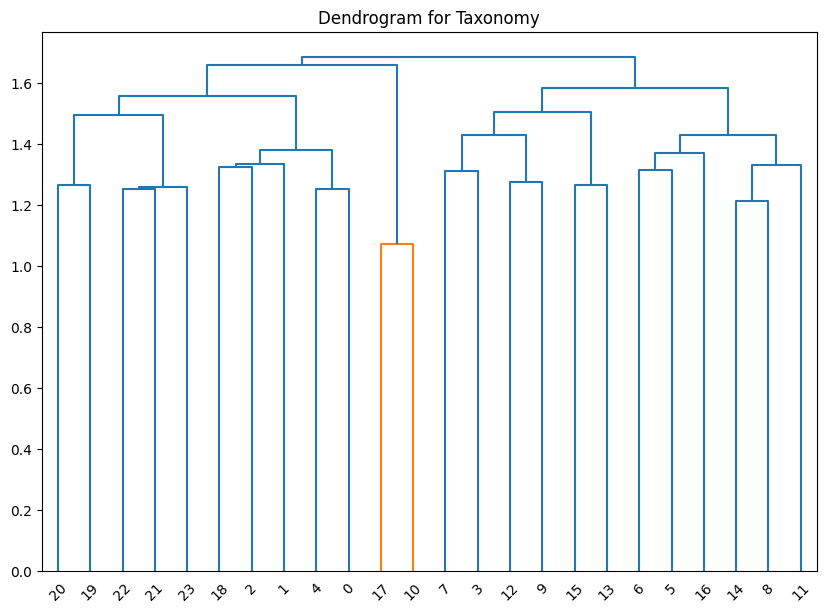

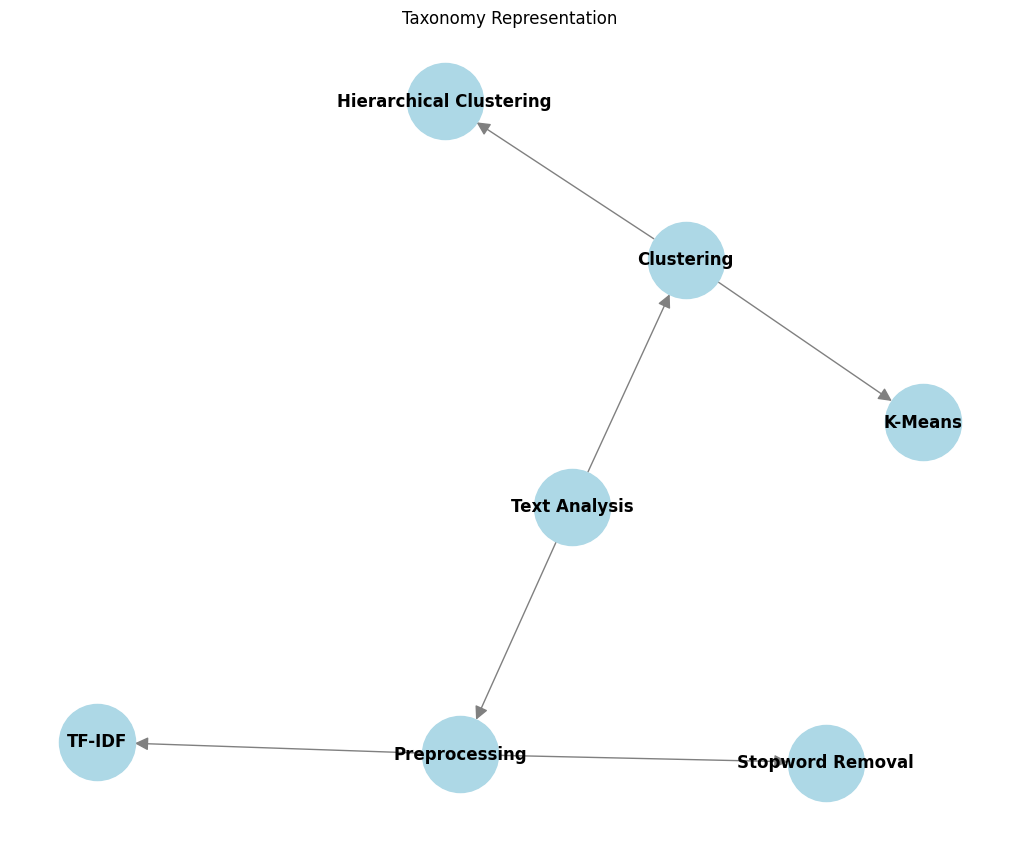

New Text Predicted Cluster: 2


In [4]:
# Required Libraries
import re
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import networkx as nx

# Download NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Scrape Text from a Webpage
def scrape_webpage(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract all paragraph text
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text

# Example webpage
url = "https://en.wikipedia.org/wiki/Natural_language_processing"
webpage_text = scrape_webpage(url)

# Step 2: Text Preprocessing (Updated)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    # Remove punctuation and lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Preprocess the scraped text
preprocessed_text = preprocess_text(webpage_text)

# Split the text into smaller chunks (Updated)
corpus = sent_tokenize(preprocessed_text)  # Split into sentences
corpus = [sentence.strip() for sentence in corpus if len(sentence.split()) > 5]  # Filter short sentences

# Fallback to paragraphs if corpus is too small
if len(corpus) < 3:
    print("Fallback: Splitting by paragraphs instead of sentences.")
    paragraphs = webpage_text.split("\n")  # Split by newlines for paragraphs
    corpus = [preprocess_text(para) for para in paragraphs if len(para.split()) > 5]

# Ensure the corpus is valid
if len(corpus) < 3:
    raise ValueError("Corpus is too small to perform clustering. Check the input text.")

print(f"Corpus Size: {len(corpus)} documents")

# Step 3: Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Step 4: Text Clustering (K-Means)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Print Clustering Results
print("Cluster Labels for Each Document:")
for i, label in enumerate(cluster_labels):
    print(f"Document {i+1}: Cluster {label}")

# Step 5: Hierarchical Clustering (Dendrogram)
linked = linkage(X.toarray(), method='ward')  # Convert sparse matrix to dense

plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Taxonomy")
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# Step 6: Taxonomy Representation (Network Graph)
taxonomy_structure = [
    ("Text Analysis", "Preprocessing"),
    ("Text Analysis", "Clustering"),
    ("Clustering", "K-Means"),
    ("Clustering", "Hierarchical Clustering"),
    ("Preprocessing", "TF-IDF"),
    ("Preprocessing", "Stopword Removal")
]

# Create and visualize the taxonomy graph
G = nx.DiGraph()
G.add_edges_from(taxonomy_structure)

plt.figure(figsize=(10, 8))
nx.draw(
    G,
    with_labels=True,
    node_color="lightblue",
    font_weight="bold",
    node_size=3000,
    edge_color="gray",
    arrowsize=20
)
plt.title("Taxonomy Representation")
plt.show()

# Step 7: Classification (Optional - Mock Example)
# Assume you have new text data for classification
new_text = ["Natural language processing is crucial for text-based insights."]
new_text_preprocessed = preprocess_text(new_text[0])
new_text_vectorized = vectorizer.transform([new_text_preprocessed])

# Predict cluster for new text
predicted_cluster = kmeans.predict(new_text_vectorized)
print(f"New Text Predicted Cluster: {predicted_cluster[0]}")
